In [ ]:
pip install tensorflow pillow numpy


ESERGAN-pre trained model version

--2024-05-05 06:34:23--  https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34146 (33K) [image/png]
Saving to: ‘original.png’

original.png        100%[===================>]  33.35K  --.-KB/s    in 0.005s  

2024-05-05 06:34:23 (6.83 MB/s) - ‘original.png’ saved [34146/34146]

Saved as Original Image.jpg
Downloaded https://tfhub.dev/captain-pool/esrgan-tf2/1, Total size: 20.60MB

Time Taken: 10.328608
Saved as Super Resolution.jpg
--2024-05-05 06:34:50--  https://lh4.googleusercontent.com/-Anmw5df4gj0/AAAAAAAAAAI/AAAAAAAAAAc/6HxU8XFLnQE/photo.jpg64
Resolving lh4.googleusercontent.com (lh4.googleusercontent.com)... 64.233.183.132, 

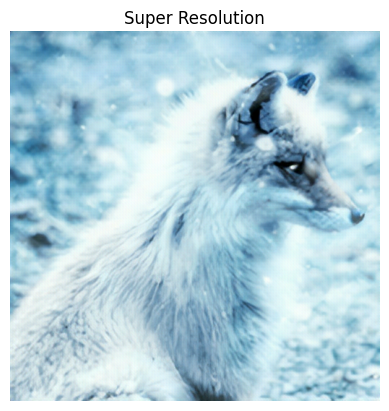

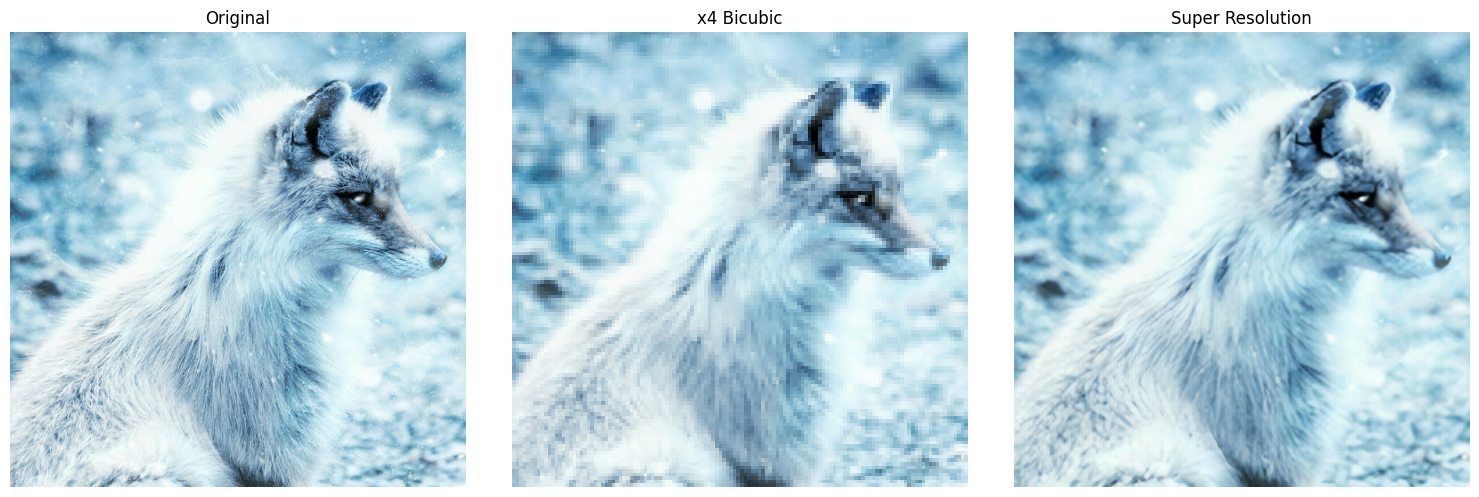

In [ ]:


import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"
!wget "https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png" -O original.png
IMAGE_PATH = "original.png"
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
def preprocess_image(image_path):

  hr_image = tf.image.decode_image(tf.io.read_file(image_path))

  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def save_image(image, filename):

  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  print("Saved as %s.jpg" % filename)
  %matplotlib inline
def plot_image(image, title=""):

  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)
hr_image = preprocess_image(IMAGE_PATH)
plot_image(tf.squeeze(hr_image), title="Original Image")
save_image(tf.squeeze(hr_image), filename="Original Image")
model = hub.load(SAVED_MODEL_PATH)
start = time.time()
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))
plot_image(tf.squeeze(fake_image), title="Super Resolution")
save_image(tf.squeeze(fake_image), filename="Super Resolution")
!wget "https://lh4.googleusercontent.com/-Anmw5df4gj0/AAAAAAAAAAI/AAAAAAAAAAc/6HxU8XFLnQE/photo.jpg64" -O test.jpg
IMAGE_PATH = "test.jpg"
# Defining helper functions
def downscale_image(image):

  image_size = []
  if len(image.shape) == 3:
    image_size = [image.shape[1], image.shape[0]]
  else:
    raise ValueError("Dimension mismatch. Can work only on single image.")

  image = tf.squeeze(
      tf.cast(
          tf.clip_by_value(image, 0, 255), tf.uint8))

  lr_image = np.asarray(
    Image.fromarray(image.numpy())
    .resize([image_size[0] // 4, image_size[1] // 4],
              Image.BICUBIC))

  lr_image = tf.expand_dims(lr_image, 0)
  lr_image = tf.cast(lr_image, tf.float32)
  return lr_image
hr_image = preprocess_image(IMAGE_PATH)
lr_image = downscale_image(tf.squeeze(hr_image))
plot_image(tf.squeeze(lr_image), title="Low Resolution")
model = hub.load(SAVED_MODEL_PATH)
start = time.time()
fake_image = model(lr_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))
plot_image(tf.squeeze(fake_image), title="Super Resolution")
# Calculating PSNR wrt Original Image
psnr = tf.image.psnr(
    tf.clip_by_value(fake_image, 0, 255),
    tf.clip_by_value(hr_image, 0, 255), max_val=255)
print("PSNR Achieved: %f" % psnr)
plt.rcParams['figure.figsize'] = [15, 10]
fig, axes = plt.subplots(1, 3)
fig.tight_layout()
plt.subplot(131)
plot_image(tf.squeeze(hr_image), title="Original")
plt.subplot(132)
fig.tight_layout()
plot_image(tf.squeeze(lr_image), "x4 Bicubic")
plt.subplot(133)
fig.tight_layout()
plot_image(tf.squeeze(fake_image), "Super Resolution")
plt.savefig("ESRGAN_DIV2K.jpg", bbox_inches="tight")
print("PSNR: %f" % psnr)


Increasing Resolution

Saved as Original Image.jpg
Time Taken: 0.324287
Saved as Simulated Super Resolution.jpg


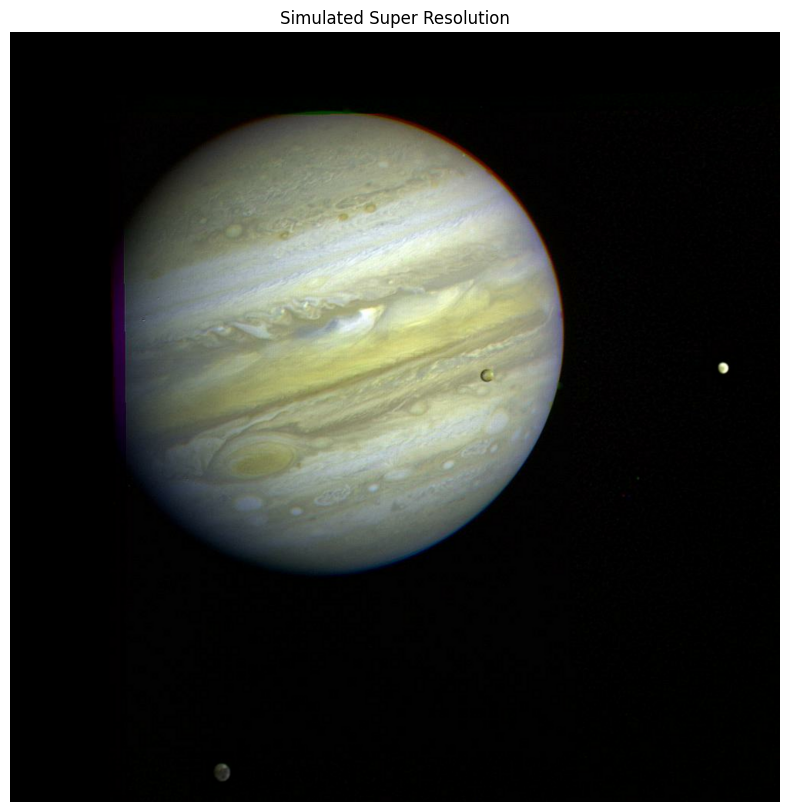

In [ ]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

def preprocess_image(image_path):
    hr_image = tf.image.decode_image(tf.io.read_file(image_path))
    if hr_image.shape[-1] == 4:
        hr_image = hr_image[..., :-1]
    hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
    hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
    hr_image = tf.cast(hr_image, tf.float32)
    return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
    if not isinstance(image, Image.Image):
        image = tf.clip_by_value(image, 0, 255)
        image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
    image.save("%s.jpg" % filename)
    print("Saved as %s.jpg" % filename)

def plot_image(image, title=""):
    image = np.asarray(image)
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
    plt.imshow(image)
    plt.axis("off")
    plt.title(title)

def simulate_super_resolution(image):

    super_res_image = tf.image.resize(image, [image.shape[1] * 4, image.shape[2] * 4], method=tf.image.ResizeMethod.BICUBIC)
    return super_res_image


IMAGE_PATH = "/content/inputimage.jpg"

# Preprocess the input image
hr_image = preprocess_image(IMAGE_PATH)


plot_image(tf.squeeze(hr_image), title="Original Image")
save_image(tf.squeeze(hr_image), filename="Original Image")


start = time.time()
fake_image = simulate_super_resolution(hr_image)
print("Time Taken: %f" % (time.time() - start))


plot_image(tf.squeeze(fake_image), title="Simulated Super Resolution")
save_image(tf.squeeze(fake_image), filename="Simulated Super Resolution")


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image

def build_sr_model():
    input_img = Input(shape=(None, None, 3))
    x = Conv2D(64, 3, activation='relu', padding='same')(input_img)
    x = Conv2D(64, 3, activation='relu', padding='same')(x)
    x = Conv2D(32, 3, activation='relu', padding='same')(x)
    output_img = Conv2D(3, 3, activation='sigmoid', padding='same')(x)
    sr_model = Model(input_img, output_img)
    return sr_model

def load_image(image_path):
    img = Image.open(image_path)
    img = np.array(img) / 255.0
    return img

def save_image(image, filename):
    image = np.clip(image, 0, 1)
    image = (image * 255).astype(np.uint8)
    Image.fromarray(image).save(filename)

def preprocess_image(image):
    return np.expand_dims(image, axis=0)

def postprocess_image(image):
    return np.squeeze(image, axis=0)

def super_resolve(image, sr_model):
    return sr_model.predict(image)

if __name__ == "__main__":
    image_path = "/content/inputimage.jpg"
    image = load_image(image_path)
    preprocessed_image = preprocess_image(image)
    sr_model = build_sr_model()
    sr_model.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error')
    sr_image = super_resolve(preprocessed_image, sr_model)
    postprocessed_image = postprocess_image(sr_image)
    save_image(postprocessed_image, "super_resolved_image.jpg")


1/1 [==============================] - 6s 6s/step


Distance Calculation (on going)

In [ ]:
import cv2
import numpy as np

def calculate_distance_from_images(image1, image2, focal_length):

    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)


    sift = cv2.SIFT_create()


    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)


    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)


    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)


    disparity_map = np.array([keypoints1[m.queryIdx].pt[0] - keypoints2[m.trainIdx].pt[0]
                              for m in good_matches])


    parallax_angle_pixels = np.mean(disparity_map)

    distance_pixels = 1/ parallax_angle_pixels

    return distance_pixels

image1 = cv2.imread('inputimage.jpg')
image2 = cv2.imread('inputimage.jpg')
focal_length = 1000

distance_pixels = calculate_distance_from_images(image1, image2, focal_length)
print("Distance to object: {:.2f} pixels".format(distance_pixels))


Distance to object: inf pixels


<ipython-input-24-e0646b79366a>:33: RuntimeWarning: divide by zero encountered in scalar divide
  distance_pixels = 1/ parallax_angle_pixels
